<a href="https://colab.research.google.com/github/andysontran/21-CHL5230-F23/blob/main/21_CHL5230_F23_PP3_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import the pandas library and alias it as 'pd'
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Import the necessary libraries for data cleaning
import re  # Regular expressions library for text manipulation

# Upload Mortality ICU dataset (nlp_dataset.csv)
from google.colab import files
uploaded = files.upload()

Saving nlp_dataset.csv to nlp_dataset.csv


In [15]:
df = pd.read_csv("nlp_dataset.csv", encoding='ISO-8859-1')

df.head()

,PMID,title,abstract,discussion
0,35294369,Machine Learning Prediction Models for Gestati...,Gestational diabetes mellitus (GDM) is a commo...,This study was a pilot meta-analysis evaluatin...
1,28494618,Machine Learning Methods to Predict Diabetes C...,One of the areas where Artificial Intelligence...,This work describes the application of a moder...
2,31694707,A data-driven approach to predicting diabetes ...,Diabetes and cardiovascular disease are two of...,Models trained on diabetic patients (Case I) g...
3,33806973,Prediction of Type 2 Diabetes Based on Machine...,Prediction of type 2 diabetes (T2D) occurrence...,This study proposed a machine learning model t...
4,35392258,Use of Machine Learning and Routine Laboratory...,Most patients with diabetes mellitus are asymp...,We studied a machine learning approach to dete...


In [16]:
# Define a cleaning function that will replace the incorrectly encoded characters.
def clean_encoding(text):
    # Replace the incorrect character sequences with the correct character.
    # You can chain multiple replace calls to handle different cases.
    text = text.replace('¡¯', "'")  # Replace the sequence that represents a single quote
    # Add additional replacements here if there are other encoding issues
    return text

# Apply the cleaning function to the 'title', 'abstract', and 'discussion' columns of the DataFrame.
df['title'] = df['title'].apply(clean_encoding)
df['abstract'] = df['abstract'].apply(clean_encoding)
df['discussion'] = df['discussion'].apply(clean_encoding)
df.head()

,PMID,title,abstract,discussion
0,35294369,Machine Learning Prediction Models for Gestati...,Gestational diabetes mellitus (GDM) is a commo...,This study was a pilot meta-analysis evaluatin...
1,28494618,Machine Learning Methods to Predict Diabetes C...,One of the areas where Artificial Intelligence...,This work describes the application of a moder...
2,31694707,A data-driven approach to predicting diabetes ...,Diabetes and cardiovascular disease are two of...,Models trained on diabetic patients (Case I) g...
3,33806973,Prediction of Type 2 Diabetes Based on Machine...,Prediction of type 2 diabetes (T2D) occurrence...,This study proposed a machine learning model t...
4,35392258,Use of Machine Learning and Routine Laboratory...,Most patients with diabetes mellitus are asymp...,We studied a machine learning approach to dete...


In [17]:
!pip install contractions
# Import libraries
import contractions

# Expand contractions in the 'title', 'abstract', and 'discussion' columns
df['title_expanded'] = df['title'].apply(lambda x: contractions.fix(x))
df['abstract_expanded'] = df['abstract'].apply(lambda x: contractions.fix(x))
df['discussion_expanded'] = df['discussion'].apply(lambda x: contractions.fix(x))
df.head()

,PMID,title,abstract,discussion,title_expanded,abstract_expanded,discussion_expanded
0,35294369,Machine Learning Prediction Models for Gestati...,Gestational diabetes mellitus (GDM) is a commo...,This study was a pilot meta-analysis evaluatin...,Machine Learning Prediction Models for Gestati...,Gestational diabetes mellitus (GDM) is a commo...,This study was a pilot meta-analysis evaluatin...
1,28494618,Machine Learning Methods to Predict Diabetes C...,One of the areas where Artificial Intelligence...,This work describes the application of a moder...,Machine Learning Methods to Predict Diabetes C...,One of the areas where Artificial Intelligence...,This work describes the application of a moder...
2,31694707,A data-driven approach to predicting diabetes ...,Diabetes and cardiovascular disease are two of...,Models trained on diabetic patients (Case I) g...,A data-driven approach to predicting diabetes ...,Diabetes and cardiovascular disease are two of...,Models trained on diabetic patients (Case I) g...
3,33806973,Prediction of Type 2 Diabetes Based on Machine...,Prediction of type 2 diabetes (T2D) occurrence...,This study proposed a machine learning model t...,Prediction of Type 2 Diabetes Based on Machine...,Prediction of type 2 diabetes (T2D) occurrence...,This study proposed a machine learning model t...
4,35392258,Use of Machine Learning and Routine Laboratory...,Most patients with diabetes mellitus are asymp...,We studied a machine learning approach to dete...,Use of Machine Learning and Routine Laboratory...,Most patients with diabetes mellitus are asymp...,We studied a machine learning approach to dete...


In [18]:
# Basic data cleaning tasks
# - Removing citations
# - Removing subheading
# - Lowercasing the text columns
# - Removing special characters and numbers

# Function to remove special characters and numbers
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

# Perform the data cleaning
df['title'] = df['title_expanded'].str.lower()
df['title'] = df['title'].apply(remove_special_characters)

df['abstract'] = df['abstract_expanded'].str.lower()
df['abstract'] = df['abstract'].apply(remove_special_characters)

df['discussion'] = df['discussion_expanded'].str.lower()
df['discussion'] = df['discussion'].apply(remove_special_characters)

df.head()

,PMID,title,abstract,discussion,title_expanded,abstract_expanded,discussion_expanded
0,35294369,machine learning prediction models for gestati...,gestational diabetes mellitus gdm is a common ...,this study was a pilot metaanalysis evaluating...,Machine Learning Prediction Models for Gestati...,Gestational diabetes mellitus (GDM) is a commo...,This study was a pilot meta-analysis evaluatin...
1,28494618,machine learning methods to predict diabetes c...,one of the areas where artificial intelligence...,this work describes the application of a moder...,Machine Learning Methods to Predict Diabetes C...,One of the areas where Artificial Intelligence...,This work describes the application of a moder...
2,31694707,a datadriven approach to predicting diabetes a...,diabetes and cardiovascular disease are two of...,models trained on diabetic patients case i gen...,A data-driven approach to predicting diabetes ...,Diabetes and cardiovascular disease are two of...,Models trained on diabetic patients (Case I) g...
3,33806973,prediction of type diabetes based on machine ...,prediction of type diabetes td occurrence all...,this study proposed a machine learning model t...,Prediction of Type 2 Diabetes Based on Machine...,Prediction of type 2 diabetes (T2D) occurrence...,This study proposed a machine learning model t...
4,35392258,use of machine learning and routine laboratory...,most patients with diabetes mellitus are asymp...,we studied a machine learning approach to dete...,Use of Machine Learning and Routine Laboratory...,Most patients with diabetes mellitus are asymp...,We studied a machine learning approach to dete...


In [19]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
def tokenize_text(text):
   return word_tokenize(text)

df['tokens_title'] = df['title'].apply(tokenize_text)
df['tokens_abstract'] = df['abstract'].apply(tokenize_text)
df['tokens_discussion'] = df['discussion'].apply(tokenize_text)
df.head()

,PMID,title,abstract,discussion,title_expanded,abstract_expanded,discussion_expanded,tokens_title,tokens_abstract,tokens_discussion
0,35294369,machine learning prediction models for gestati...,gestational diabetes mellitus gdm is a common ...,this study was a pilot metaanalysis evaluating...,Machine Learning Prediction Models for Gestati...,Gestational diabetes mellitus (GDM) is a commo...,This study was a pilot meta-analysis evaluatin...,"[machine, learning, prediction, models, for, g...","[gestational, diabetes, mellitus, gdm, is, a, ...","[this, study, was, a, pilot, metaanalysis, eva..."
1,28494618,machine learning methods to predict diabetes c...,one of the areas where artificial intelligence...,this work describes the application of a moder...,Machine Learning Methods to Predict Diabetes C...,One of the areas where Artificial Intelligence...,This work describes the application of a moder...,"[machine, learning, methods, to, predict, diab...","[one, of, the, areas, where, artificial, intel...","[this, work, describes, the, application, of, ..."
2,31694707,a datadriven approach to predicting diabetes a...,diabetes and cardiovascular disease are two of...,models trained on diabetic patients case i gen...,A data-driven approach to predicting diabetes ...,Diabetes and cardiovascular disease are two of...,Models trained on diabetic patients (Case I) g...,"[a, datadriven, approach, to, predicting, diab...","[diabetes, and, cardiovascular, disease, are, ...","[models, trained, on, diabetic, patients, case..."
3,33806973,prediction of type diabetes based on machine ...,prediction of type diabetes td occurrence all...,this study proposed a machine learning model t...,Prediction of Type 2 Diabetes Based on Machine...,Prediction of type 2 diabetes (T2D) occurrence...,This study proposed a machine learning model t...,"[prediction, of, type, diabetes, based, on, ma...","[prediction, of, type, diabetes, td, occurrenc...","[this, study, proposed, a, machine, learning, ..."
4,35392258,use of machine learning and routine laboratory...,most patients with diabetes mellitus are asymp...,we studied a machine learning approach to dete...,Use of Machine Learning and Routine Laboratory...,Most patients with diabetes mellitus are asymp...,We studied a machine learning approach to dete...,"[use, of, machine, learning, and, routine, lab...","[most, patients, with, diabetes, mellitus, are...","[we, studied, a, machine, learning, approach, ..."


In [21]:
# Import the 'stopwords' corpus from the Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords

# Download the set of stopwords from NLTK. This is necessary the first time you run this code.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df'.
df['tokens_no_stop_title'] = df['tokens_title'].apply(remove_stop_words)
df['tokens_no_stop_abstract'] = df['tokens_abstract'].apply(remove_stop_words)
df['tokens_no_stop_discussion'] = df['tokens_discussion'].apply(remove_stop_words)

df.head()

,PMID,title,abstract,discussion,title_expanded,abstract_expanded,discussion_expanded,tokens_title,tokens_abstract,tokens_discussion,tokens_no_stop_title,tokens_no_stop_abstract,tokens_no_stop_discussion
0,35294369,machine learning prediction models for gestati...,gestational diabetes mellitus gdm is a common ...,this study was a pilot metaanalysis evaluating...,Machine Learning Prediction Models for Gestati...,Gestational diabetes mellitus (GDM) is a commo...,This study was a pilot meta-analysis evaluatin...,"[machine, learning, prediction, models, for, g...","[gestational, diabetes, mellitus, gdm, is, a, ...","[this, study, was, a, pilot, metaanalysis, eva...","[machine, learning, prediction, models, gestat...","[gestational, diabetes, mellitus, gdm, common,...","[study, pilot, metaanalysis, evaluating, perfo..."
1,28494618,machine learning methods to predict diabetes c...,one of the areas where artificial intelligence...,this work describes the application of a moder...,Machine Learning Methods to Predict Diabetes C...,One of the areas where Artificial Intelligence...,This work describes the application of a moder...,"[machine, learning, methods, to, predict, diab...","[one, of, the, areas, where, artificial, intel...","[this, work, describes, the, application, of, ...","[machine, learning, methods, predict, diabetes...","[one, areas, artificial, intelligence, impact,...","[work, describes, application, modern, data, m..."
2,31694707,a datadriven approach to predicting diabetes a...,diabetes and cardiovascular disease are two of...,models trained on diabetic patients case i gen...,A data-driven approach to predicting diabetes ...,Diabetes and cardiovascular disease are two of...,Models trained on diabetic patients (Case I) g...,"[a, datadriven, approach, to, predicting, diab...","[diabetes, and, cardiovascular, disease, are, ...","[models, trained, on, diabetic, patients, case...","[datadriven, approach, predicting, diabetes, c...","[diabetes, cardiovascular, disease, two, main,...","[models, trained, diabetic, patients, case, ge..."
3,33806973,prediction of type diabetes based on machine ...,prediction of type diabetes td occurrence all...,this study proposed a machine learning model t...,Prediction of Type 2 Diabetes Based on Machine...,Prediction of type 2 diabetes (T2D) occurrence...,This study proposed a machine learning model t...,"[prediction, of, type, diabetes, based, on, ma...","[prediction, of, type, diabetes, td, occurrenc...","[this, study, proposed, a, machine, learning, ...","[prediction, type, diabetes, based, machine, l...","[prediction, type, diabetes, td, occurrence, a...","[study, proposed, machine, learning, model, pr..."
4,35392258,use of machine learning and routine laboratory...,most patients with diabetes mellitus are asymp...,we studied a machine learning approach to dete...,Use of Machine Learning and Routine Laboratory...,Most patients with diabetes mellitus are asymp...,We studied a machine learning approach to dete...,"[use, of, machine, learning, and, routine, lab...","[most, patients, with, diabetes, mellitus, are...","[we, studied, a, machine, learning, approach, ...","[use, machine, learning, routine, laboratory, ...","[patients, diabetes, mellitus, asymptomatic, l...","[studied, machine, learning, approach, detect,..."


In [23]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
df['lemmatized_title'] = df['tokens_no_stop_title'].apply(lemmatize_tokens_with_pos)
df['lemmatized_abstract'] = df['tokens_no_stop_abstract'].apply(lemmatize_tokens_with_pos)
df['lemmatized_discussion'] = df['tokens_no_stop_discussion'].apply(lemmatize_tokens_with_pos)

# Display the DataFrame
df[['discussion', 'tokens_discussion', 'lemmatized_discussion']].head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,discussion,tokens_discussion,lemmatized_discussion
0,this study was a pilot metaanalysis evaluating...,"[this, study, was, a, pilot, metaanalysis, eva...","[study, pilot, metaanalysis, evaluate, perform..."
1,this work describes the application of a moder...,"[this, work, describes, the, application, of, ...","[work, describe, application, modern, data, mi..."
2,models trained on diabetic patients case i gen...,"[models, trained, on, diabetic, patients, case...","[model, train, diabetic, patient, case, genera..."
3,this study proposed a machine learning model t...,"[this, study, proposed, a, machine, learning, ...","[study, propose, machine, learn, model, predic..."
4,we studied a machine learning approach to dete...,"[we, studied, a, machine, learning, approach, ...","[study, machine, learn, approach, detect, dm, ..."


In [77]:
# Define additional context-sensitive stop words
context_sensitive_stop_words = set(['machine', 'learning', 'machinelearning', 'model', 'use', 'diabetes', 'algorithm',
                                    'mellitus', 'prediction', 'classifiers', 'artificial', 'intelligence', 'study', 'data',
                                    'prediabetes', 'result', 'dataset', 'patient', 'dm', 'metaanalysis', 'diabetic', 'td', 'detect',
                                    'predict', 'learn', 'mining', 'train', 'ml', 'gdm', 'pipeline', 'application', 'occurrence',
                                    'performance', 'predictive', 'feature', 'accuracy', 'include', 'high', 'analysis', 'show', 'may',
                                    'variable', 'classification', 'xgboost', 'auc', 'et', 'al', 'datasets', 'diagnosis', 'increase',
                                    'compare', 'base', 'clinical', 'risk', 'tdm', 'apply', 'identify', 'develop', 'achieve', 'method',
                                    'value', 'different', 'dn', 'propose', 'test', 'technique', 'among', 'demonstrate', 'report',
                                    'cohort', 'important', 'find', 'complication', 'approach', 'level', 'well', 'disease', 'factor',
                                    'one', 'associate', 'provide', 'information', 'several', 'table', 'suggest', 'perform', 'type',
                                    'respectively', 'best', 'although', 'classifier', 'ensemble', 'conduct', 'great', 'hbac', 'logistic',
                                    'regression', 'svm', 'shap', 'thus', 'algorithms', 'external', 'validation'
                                    ])

# English stop words
stop_words_set = set(stopwords.words('english'))

# Extend the previously defined function to remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    # Combine the general English stop words with the context-specific stop words
    # to create a comprehensive set of words to filter out.
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in tokens if token.lower() not in all_stop_words]

# Apply the updated function to remove both general and context-sensitive stop words
df['tokens_no_stop_context_title'] = df['lemmatized_title'].apply(remove_context_sensitive_stop_words)
df['tokens_no_stop_context_abstract'] = df['lemmatized_abstract'].apply(remove_context_sensitive_stop_words)
df['tokens_no_stop_context_discussion'] = df['lemmatized_discussion'].apply(remove_context_sensitive_stop_words)

# Display the DataFrame
df[['discussion', 'tokens_discussion', 'tokens_no_stop_context_discussion']].head()

,discussion,tokens_discussion,tokens_no_stop_context_discussion
0,this study was a pilot metaanalysis evaluating...,"[this, study, was, a, pilot, metaanalysis, eva...","[pilot, evaluate, overall, pool, estimation, e..."
1,this work describes the application of a moder...,"[this, work, describes, the, application, of, ...","[work, describe, modern, combine, variety, exp..."
2,models trained on diabetic patients case i gen...,"[models, trained, on, diabetic, patients, case...","[case, generally, obtain, power, case, ii, rec..."
3,this study proposed a machine learning model t...,"[this, study, proposed, a, machine, learning, ...","[follow, year, previous, work, scheme, forecas..."
4,we studied a machine learning approach to dete...,"[we, studied, a, machine, learning, approach, ...","[frequently, laboratory, examination, glycated..."


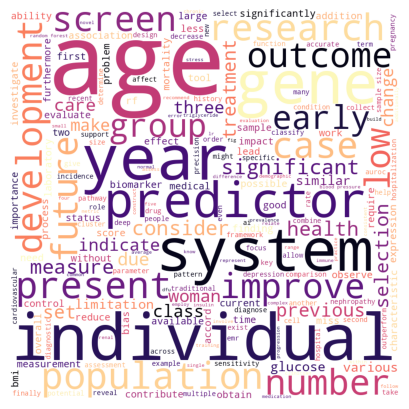

In [81]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokens from the 'lemmatized' column into a single list
all_tokens = sum(df['tokens_no_stop_context_discussion'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.9, 3.9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()